# Training Data
This notebook takes the large data set, and creates a subset that will be faster to train models with.
The original data set is over 3 GB.  

I'll create a train/test data set that has 100k reviews.  There will be 75k training rows, and 25k test rows.

In [1]:
import nltk
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Read JSON file in chunks
chunk_size = 100000  # Adjust the chunk size as needed
chunks = []
with open('Kindle_Store.json', 'r') as file:
    for chunk in pd.read_json(file, chunksize=chunk_size, lines=True):
        chunks.append(chunk)

# Concatenate all chunks to form a single DataFrame
df = pd.concat(chunks, ignore_index=True)

In [3]:
kindle_only_df = df[df['style'] == {'Format:': ' Kindle Edition'}]

In [4]:
book_df = pd.read_csv("amazon_com_extras.csv", encoding='latin1')

In [5]:
kindle_only_df = pd.merge(kindle_only_df, book_df[['asin', 'author']], on='asin', how='left')

In [7]:
def count_words(text):
    return len(str(text).split())

In [8]:
df['wordCount'] = df['reviewText'].apply(count_words)

In [9]:
# Download NLTK stopwords and Punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isnull(text):
        return ''
    
    text = text.lower()
    
    # Tokenization and removing stopwords
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    return ' '.join(tokens)

# Apply text preprocessing to 'reviewText' and 'summary' columns
kindle_only_df['processed_reviewText'] = kindle_only_df['reviewText'].apply(preprocess_text)
kindle_only_df['processed_summary'] = kindle_only_df['summary'].apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_reviewText = vectorizer.fit_transform(kindle_only_df['processed_reviewText'])
X_summary = vectorizer.fit_transform(kindle_only_df['processed_summary'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dethloffe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dethloffe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:

kindle_only_df['processed_reviewText'] = kindle_only_df['reviewText'].apply(preprocess_text)
kindle_only_df['processed_summary'] = kindle_only_df['summary'].apply(preprocess_text)

vectorizer = TfidfVectorizer()
X_reviewText = vectorizer.fit_transform(kindle_only_df['processed_reviewText'])
X_summary = vectorizer.fit_transform(kindle_only_df['processed_summary'])

In [20]:
kindle_only_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045160 entries, 0 to 5045159
Data columns (total 15 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   overall               int64 
 1   verified              bool  
 2   reviewTime            object
 3   reviewerID            object
 4   asin                  object
 5   style                 object
 6   reviewerName          object
 7   reviewText            object
 8   summary               object
 9   unixReviewTime        int64 
 10  vote                  object
 11  image                 object
 12  author                object
 13  processed_reviewText  object
 14  processed_summary     object
dtypes: bool(1), int64(2), object(12)
memory usage: 543.7+ MB


In [21]:
df_1 = kindle_only_df[kindle_only_df['overall'] == 1].sample(20_000)
df_2 = kindle_only_df[kindle_only_df['overall'] == 2].sample(20_000)
df_3 = kindle_only_df[kindle_only_df['overall'] == 3].sample(20_000)
df_4 = kindle_only_df[kindle_only_df['overall'] == 4].sample(20_000)
df_5 = kindle_only_df[kindle_only_df['overall'] == 5].sample(20_000)
sample_df = pd.concat([df_1, df_2, df_3, df_4, df_5])

<Axes: xlabel='overall', ylabel='Count'>

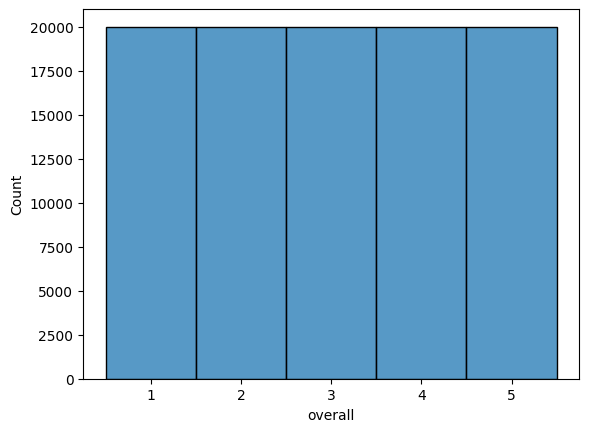

In [22]:
sns.histplot(data=sample_df, x='overall', discrete=True)

In [23]:
# remove commas from vote column
sample_df['vote'] = sample_df['vote'].str.replace(',', '')
# cast vote column to int, converting Nan to 0
sample_df['vote'] = sample_df['vote'].fillna(0)
sample_df['vote'] = sample_df['vote'].astype('int')
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2623300 to 1984611
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   overall               100000 non-null  int64 
 1   verified              100000 non-null  bool  
 2   reviewTime            100000 non-null  object
 3   reviewerID            100000 non-null  object
 4   asin                  100000 non-null  object
 5   style                 100000 non-null  object
 6   reviewerName          99999 non-null   object
 7   reviewText            99983 non-null   object
 8   summary               99964 non-null   object
 9   unixReviewTime        100000 non-null  int64 
 10  vote                  100000 non-null  int32 
 11  image                 72 non-null      object
 12  author                3478 non-null    object
 13  processed_reviewText  100000 non-null  object
 14  processed_summary     100000 non-null  object
dtypes: bool(1), int

In [24]:
#filling in empty columns with empty strings
sample_df['reviewText'] = sample_df['reviewText'].fillna('')
sample_df['summary'] = sample_df['summary'].fillna('')
sample_df['reviewerName'] = sample_df['reviewerName'].fillna('')

In [25]:
train_sample_df, test_sample_df = train_test_split(sample_df, test_size=0.25, random_state=42)
train_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75000 entries, 2200719 to 3491450
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   overall               75000 non-null  int64 
 1   verified              75000 non-null  bool  
 2   reviewTime            75000 non-null  object
 3   reviewerID            75000 non-null  object
 4   asin                  75000 non-null  object
 5   style                 75000 non-null  object
 6   reviewerName          75000 non-null  object
 7   reviewText            75000 non-null  object
 8   summary               75000 non-null  object
 9   unixReviewTime        75000 non-null  int64 
 10  vote                  75000 non-null  int32 
 11  image                 57 non-null     object
 12  author                2651 non-null   object
 13  processed_reviewText  75000 non-null  object
 14  processed_summary     75000 non-null  object
dtypes: bool(1), int32(1), int64(2), o

In [26]:
sample_df.reset_index(drop=True, inplace=True)
sample_df.to_feather("100k_kindle_reviews.feather")
train_sample_df.reset_index(drop=True, inplace=True)
train_sample_df.to_feather("75k_train_kindle_reviews.feather")
test_sample_df.reset_index(drop=True, inplace=True)
test_sample_df.to_feather("25k_test_kindle_reviews.feather")

In [27]:
loaded_test_sample_df = pd.read_feather("25k_test_kindle_reviews.feather")
loaded_test_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   overall               25000 non-null  int64 
 1   verified              25000 non-null  bool  
 2   reviewTime            25000 non-null  object
 3   reviewerID            25000 non-null  object
 4   asin                  25000 non-null  object
 5   style                 25000 non-null  object
 6   reviewerName          25000 non-null  object
 7   reviewText            25000 non-null  object
 8   summary               25000 non-null  object
 9   unixReviewTime        25000 non-null  int64 
 10  vote                  25000 non-null  int32 
 11  image                 15 non-null     object
 12  author                827 non-null    object
 13  processed_reviewText  25000 non-null  object
 14  processed_summary     25000 non-null  object
dtypes: bool(1), int32(1), int64(2), obje